# US Housing Data Analysis 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib as mpl

mpl.rcParams['patch.force_edgecolor'] = True

In [5]:
df = pd.read_csv('kc_house_data.csv')

Checking the head of the dataset to get the general overview about the data 

In [6]:
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### DATA CLEANSING PROCESS

Use of the info() function for basic information about the data like:
* No. of rows
* No. of columns
* Datatype of each column
* Do any columns contain null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


The Date columns has the values of string type. 
We need to convert those values to timestamp values using the pandas builtin 'datetime function' 

In [9]:
df['date'] = pd.to_datetime(df['date']) 

* The waterfront column in data-set is categorical column which should have values either 'yes' or 'no'.
* we need to replace the values 0 and 1 with appropriate 'yes' or 'no' values using the replace function

In [10]:
df['waterfront'] = df['waterfront'].replace(0,'No') 
df['waterfront'] = df['waterfront'].replace(1,'Yes')

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


THE CONDITON COLUMN IN THE DATASET REPRESENT THE LIVING CONDITION OF THE HOUSES WHICH HAS GRADES FROM 1 TO 5.
THE GRADES NEED TO BE REPLACED WITH THE APPROPIRATE REMARK FOR EASE OF UNDERSTANDING AND READABLITY.
* 1 is POOR
* 2 is SATISFACTORY
* 3 is GOOD
* 4 is VERY GOOD
* 5 is EXCELLENT

In [12]:
dmap = {1:'Poor',2:'Satisfactory',3:'Good',4:'Very Good',5:'Excellent'}
df['condition'] = df['condition'].map(dmap)

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* The yr_renovated and basement_sqft columns in data set contains many values with that have zero number meaning that the yr_renovated is not known. 
* These zero entries need to be replaced with the constant string like 'Unknown'.

In [14]:
df['yr_renovated'] = df['yr_renovated'].replace(0,'Unknown')

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,Unknown,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,Unknown,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,Unknown,98074,47.6168,-122.045,1800,7503


In [16]:
df['sqft_basement'] = df['sqft_basement'].replace(0,'Unknown')

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503


Dropping of the following two unused columns in the analysis
* sqft_living15
* sqft_lot15

In [49]:
df.drop(['sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [18]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null object
yr_built         21613 non-null int64
yr_renovated     21613 non-null object
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(11), object(4)
memory usa

## Gathering the Basic Stats about the data.

In [19]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


 What are Top 5 most common number of bedrooms in the houses bought in US ?

In [20]:
df['bedrooms'].value_counts().head()

3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64

What are the top 5 most common number of floors in the houses bought in US?

In [21]:
df['floors'].value_counts().head()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: floors, dtype: int64

### Different kinds of question about the data-set that can be answered by the EDA

What is the genreal distribution of price in dataset?

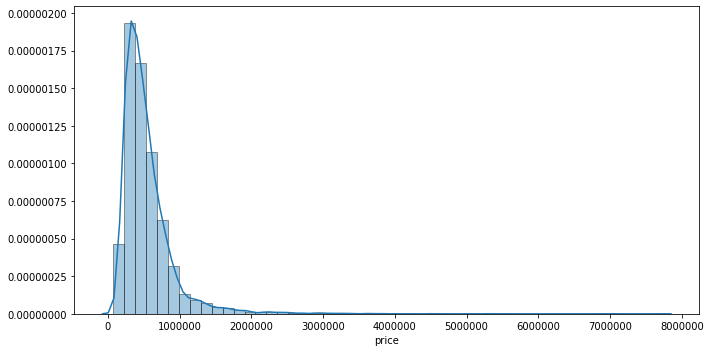

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])
plt.tight_layout()

Deriving the correlation map among different variable to check existence of strong relationship between two variables.
* NOTE: It is important to know that if incase there is a strong "correlation" between two variables it does not necessarily imply "causality".

In [23]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,0.011592,0.008130,-0.010842,0.021380,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.397293,0.667434,0.605567,0.054012,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.079532,0.356967,0.477600,0.154178,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.187737,0.664983,0.685342,0.506019,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.284611,0.762704,0.876597,0.318049,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.074710,0.113621,0.183512,0.053080,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.029444,0.458183,0.523885,0.489319,-0.059121,0.049614,0.125419,0.279885,-0.011269
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,1.000000,0.251321,0.167649,-0.053440,0.084827,0.006157,-0.078400,0.280439,0.072575
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.251321,1.000000,0.755923,0.446963,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.167649,0.755923,1.000000,0.423898,-0.261190,-0.000816,0.343803,0.731870,0.194050


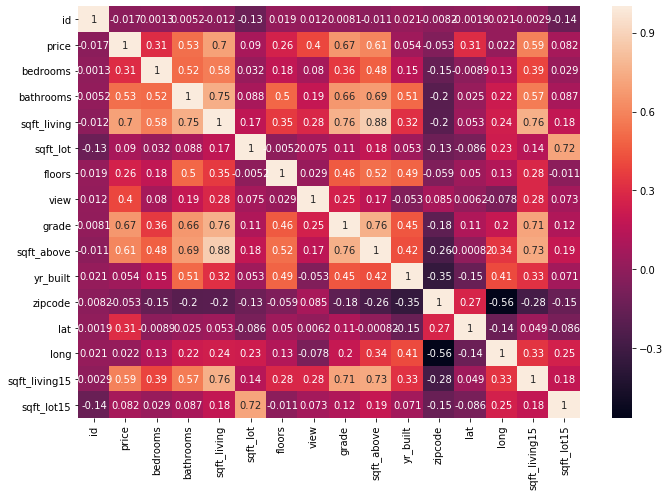

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

What is distribution of the price over time?

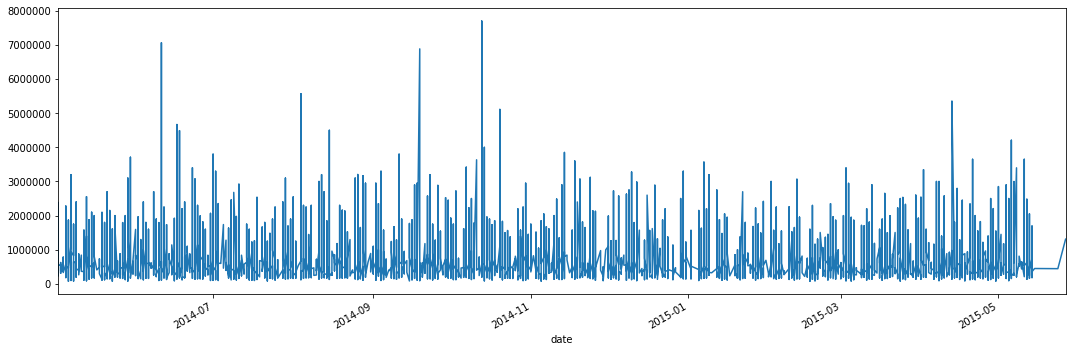

In [25]:
plt.figure(figsize=(15,5))
df.set_index('date')['price'].plot()
plt.tight_layout()

How the price vs sqft_living compare?

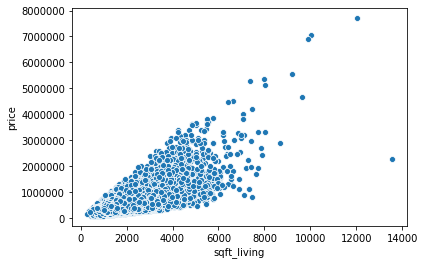

In [26]:
sns.scatterplot(x='sqft_living',y='price',data=df)

How does the prices of the houses compare w.r.t to waterfront?

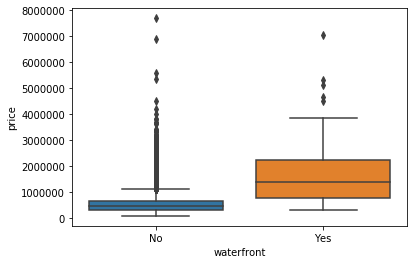

In [27]:
sns.boxplot(x='waterfront',y='price',data=df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null object
yr_built         21613 non-null int64
yr_renovated     21613 non-null object
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(11), object(4)
memory usa

How the prices of houses compare with respect living condition?

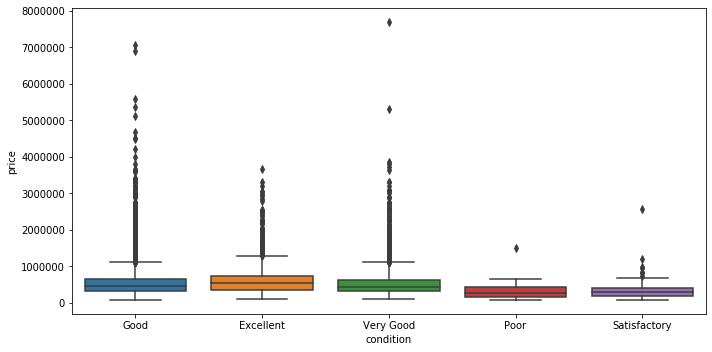

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='condition',y='price',data=df)
plt.tight_layout()

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503


How does the prices of houses compare wrt to floors and waterfront ?

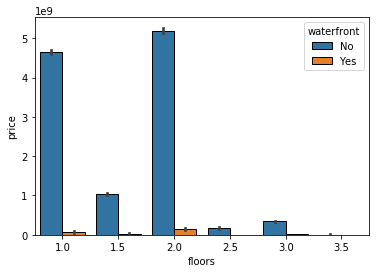

In [31]:
sns.barplot(x='floors',y='price',data=df,hue='waterfront',estimator=np.sum)

How does the prices of house compare wrt to bedrooms and waterfront ?

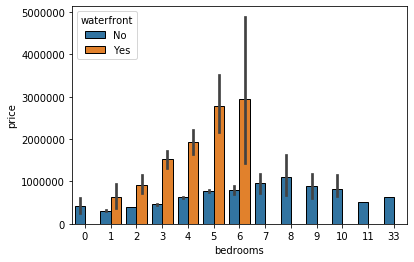

In [32]:
sns.barplot(x='bedrooms',y='price',data=df,hue='waterfront')

What are average prices of houses with differnt number of bathrooms?

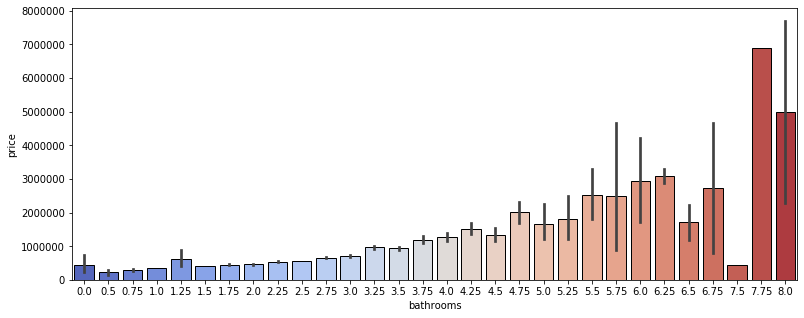

In [33]:
plt.figure(figsize=(13,5))
sns.barplot(x='bathrooms',y='price',data=df,estimator=np.mean,palette='coolwarm')

### Creating new features

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503


In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503


### Dealing with time data
* As we have converted the date column into timestamp earlier we can easily extract the month number using the builtin function.
* The month extracted is stored into the new column called "Month"
* The month number has been mapped to corresponding month name to ease readablity

In [40]:
df['Month'] = df['date'].apply(lambda t:t.month)

In [41]:
dsap = {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}

In [42]:
df['Month'] = df['Month'].map(dsap)

In [43]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650,OCT
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,DEC
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062,FEB
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000,DEC
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503,FEB


What are the average prices over different months ?

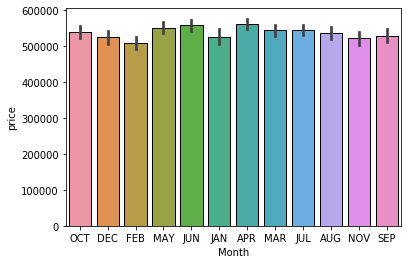

In [44]:
sns.barplot(x='Month',y='price',data=df)

What are the average price of houses with and without waterfront for different months ?

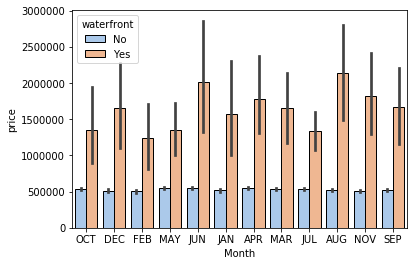

In [45]:
sns.barplot(x='Month',y='price',data=df,hue='waterfront',palette='pastel')

In [46]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,...,1180,Unknown,1955,Unknown,98178,47.5112,-122.257,1340,5650,OCT
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,DEC
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,...,770,Unknown,1933,Unknown,98028,47.7379,-122.233,2720,8062,FEB
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,...,1050,910,1965,Unknown,98136,47.5208,-122.393,1360,5000,DEC
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,...,1680,Unknown,1987,Unknown,98074,47.6168,-122.045,1800,7503,FEB


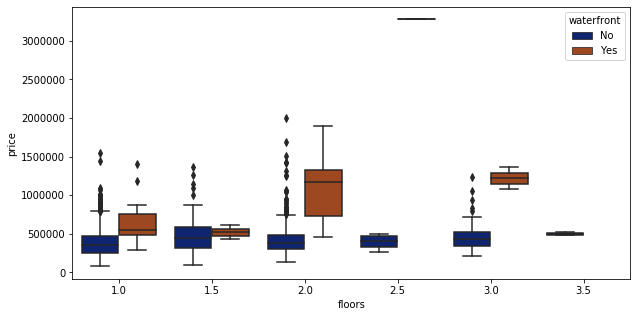

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x='floors',y='price',data = df[df['bedrooms'] == 2],hue='waterfront',palette='dark')